In [24]:
import pandas as pd

df = pd.read_csv("sample_reviews.tsv", delimiter="\t", on_bad_lines="skip")

In [25]:
print(df.head())

  marketplace  customer_id       review_id  product_id  product_parent  \
0          US      2975964  R1NBG94582SJE2  B00I01JQJM       860486164   
1          US     23526356  R273DCA6Y0H9V7  B00TCO0ZAA       292641483   
2          US     52764145   RQVOXO7WUOFK6  B00B7733E0        75825744   
3          US     47348933  R1KWKSF21PO6HO  B006ZN4U34       789352955   
4          US     33680700  R38H3UO1J190GI  B00HUEBGMU        19067902   

                                       product_title product_category  \
0  GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...           Camera   
1  Professional 58mm Center Pinch Lens Cap for CA...           Camera   
2  Spy Tec Z12 Motion Activated Intelligent Secur...           Camera   
3  Celestron UpClose G2 10x25 Monocular, Black (7...           Camera   
4  Vidpro XM-L Wired Lavalier microphone - 20' Au...           Camera   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N

In [26]:
# Keep only the necessary columns
df = df[["customer_id", "product_id", "star_rating", "helpful_votes", 
         "total_votes", "vine", "verified_purchase", "review_headline", 
         "review_body", "review_date"]]

# Display the updated DataFrame
print(df.head())


   customer_id  product_id  star_rating  helpful_votes  total_votes vine  \
0      2975964  B00I01JQJM            5              0            0    N   
1     23526356  B00TCO0ZAA            5              0            0    N   
2     52764145  B00B7733E0            2              1            1    N   
3     47348933  B006ZN4U34            5              0            0    N   
4     33680700  B00HUEBGMU            5              1            1    N   

  verified_purchase                               review_headline  \
0                 Y                                    Five Stars   
1                 Y                                    Love it!!!   
2                 Y                    Another Motion Detect Fail   
3                 Y           Exactly what I wanted and expected.   
4                 Y  Good mic at a Good Price...Not Canon Though.   

                                         review_body review_date  
0                                                 ok  2015-08

In [27]:
# Fill missing values in Review Body
df["review_body"] = df["review_body"].fillna("No Review")


In [28]:
# Convert review date with datetime
df["review_date"] = pd.to_datetime(df["review_date"])


In [29]:
# Vine and Verified Purchase to binary
df["vine"] = df["vine"].map({"Y": 1, "N": 0})
df["verified_purchase"] = df["verified_purchase"].map({"Y": 1, "N": 0})


In [30]:
# Columns into ints
df["star_rating"] = df["star_rating"].astype(int)
df["helpful_votes"] = df["helpful_votes"].astype(int)
df["total_votes"] = df["total_votes"].astype(int)
print(df.head())


   customer_id  product_id  star_rating  helpful_votes  total_votes  vine  \
0      2975964  B00I01JQJM            5              0            0     0   
1     23526356  B00TCO0ZAA            5              0            0     0   
2     52764145  B00B7733E0            2              1            1     0   
3     47348933  B006ZN4U34            5              0            0     0   
4     33680700  B00HUEBGMU            5              1            1     0   

   verified_purchase                               review_headline  \
0                  1                                    Five Stars   
1                  1                                    Love it!!!   
2                  1                    Another Motion Detect Fail   
3                  1           Exactly what I wanted and expected.   
4                  1  Good mic at a Good Price...Not Canon Though.   

                                         review_body review_date  
0                                                

In [31]:
# Normalize Text
import re

def clean_text(text):
    text = str(text).lower().strip()  # Ensure string type, lowercase, remove extra spaces
    text = re.sub(r'<.*?>', ' ', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s\']', ' ', text)  # Keep words, spaces, and apostrophes
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text

df["review_body"] = df["review_body"].apply(clean_text)
df["review_headline"] = df["review_headline"].apply(clean_text)

print(df.head())

   customer_id  product_id  star_rating  helpful_votes  total_votes  vine  \
0      2975964  B00I01JQJM            5              0            0     0   
1     23526356  B00TCO0ZAA            5              0            0     0   
2     52764145  B00B7733E0            2              1            1     0   
3     47348933  B006ZN4U34            5              0            0     0   
4     33680700  B00HUEBGMU            5              1            1     0   

   verified_purchase                             review_headline  \
0                  1                                  five stars   
1                  1                                    love it    
2                  1                  another motion detect fail   
3                  1         exactly what i wanted and expected    
4                  1  good mic at a good price not canon though    

                                         review_body review_date  
0                                                 ok  2015-08

In [32]:
# Display basic info about the dataset after cleaning
print("Dataset Info:")
print(df.info())

# Check for any remaining missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display first few rows to verify text cleaning
print("\nSample Cleaned Reviews:")
print(df[["review_headline", "review_body"]].head(10))

# Check unique values in categorical columns (vine, verified_purchase)
print("\nVine Review Counts:")
print(df["vine"].value_counts())

print("\nVerified Purchase Counts:")
print(df["verified_purchase"].value_counts())

# Summary of numerical columns (star_rating, helpful_votes, total_votes)
print("\nNumerical Summary:")
print(df[["star_rating", "helpful_votes", "total_votes"]].describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        10000 non-null  int64         
 1   product_id         10000 non-null  object        
 2   star_rating        10000 non-null  int32         
 3   helpful_votes      10000 non-null  int32         
 4   total_votes        10000 non-null  int32         
 5   vine               10000 non-null  int64         
 6   verified_purchase  10000 non-null  int64         
 7   review_headline    10000 non-null  object        
 8   review_body        10000 non-null  object        
 9   review_date        10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(3), int64(3), object(3)
memory usage: 664.2+ KB
None

Missing Values:
customer_id          0
product_id           0
star_rating          0
helpful_votes        0
total_votes          0


C:\Users\wange\AppData\Local\Temp\ipykernel_23100\3229041208.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="verified_purchase", data=df, ax=axes[1], palette="Set2")


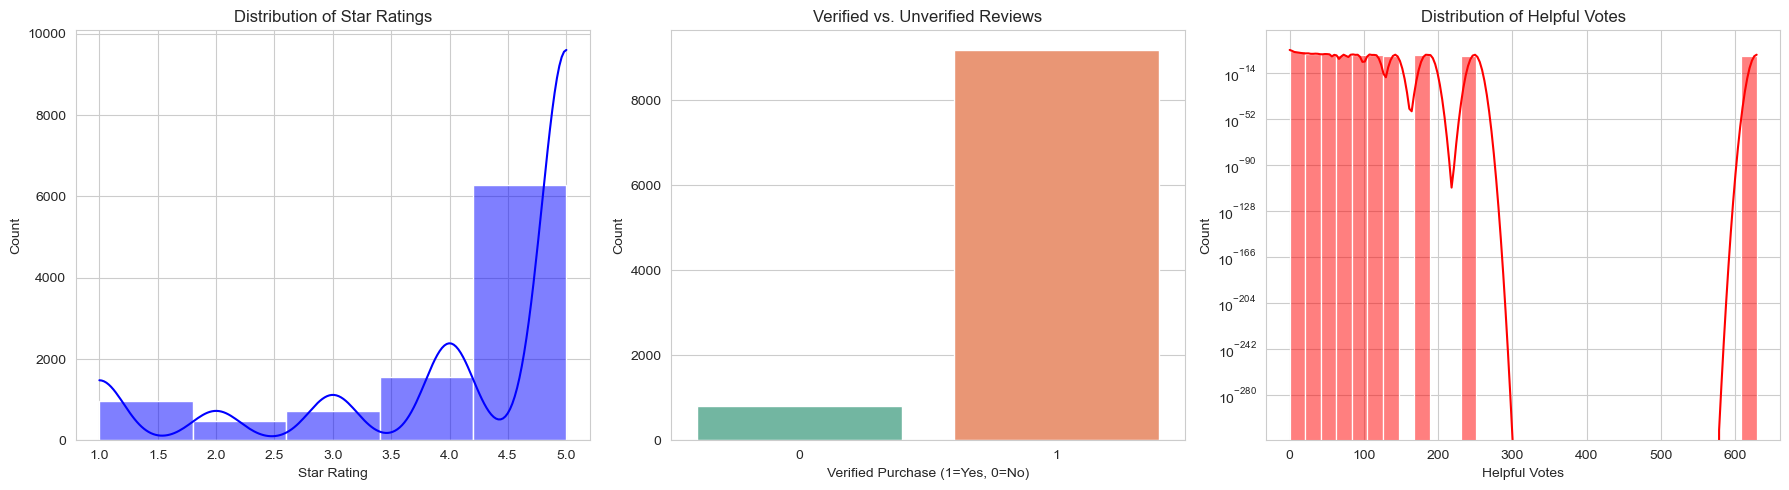

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set_style("whitegrid")

# Create subplots for EDA
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1️⃣ Rating Distribution
sns.histplot(df["star_rating"], bins=5, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Star Ratings")
axes[0].set_xlabel("Star Rating")
axes[0].set_ylabel("Count")

# 2️⃣ Verified vs. Unverified Reviews
sns.countplot(x="verified_purchase", data=df, ax=axes[1], palette="Set2")
axes[1].set_title("Verified vs. Unverified Reviews")
axes[1].set_xlabel("Verified Purchase (1=Yes, 0=No)")
axes[1].set_ylabel("Count")

# 3️⃣ Helpful Votes Distribution (Log Scale to Handle Large Values)
sns.histplot(df["helpful_votes"], bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_yscale("log")  # Log scale for better visibility
axes[2].set_title("Distribution of Helpful Votes")
axes[2].set_xlabel("Helpful Votes")
axes[2].set_ylabel("Count")

# Show the plots
plt.tight_layout()
plt.show()
